In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [16]:
import matplotlib as mpl
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [17]:
import sklearn as sk

In [28]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [30]:
import missingno as msno

In [50]:
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [51]:
import warnings
warnings.filterwarnings("ignore")

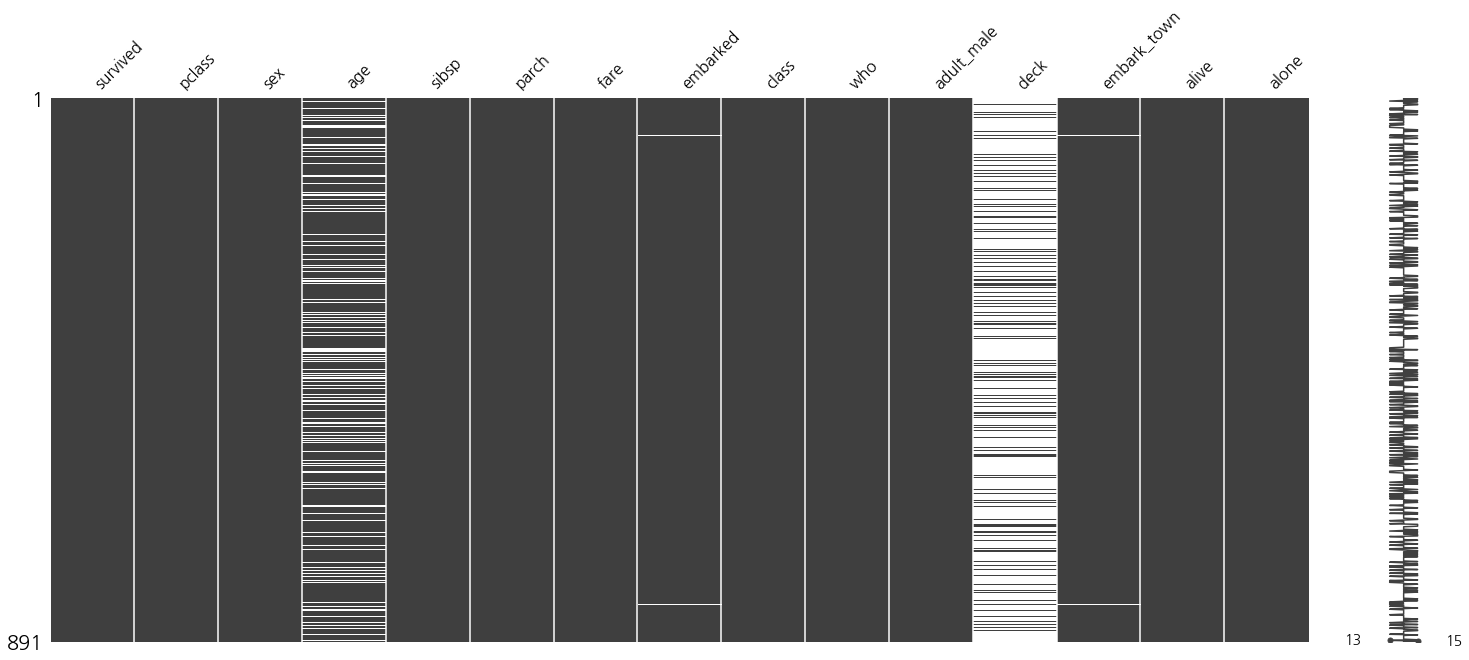

In [52]:
msno.matrix(titanic)
plt.show()

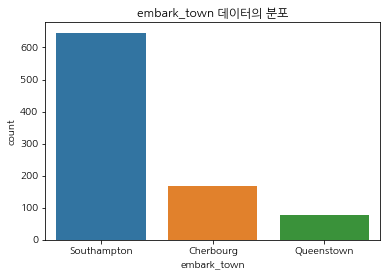

In [43]:
sns.countplot(titanic.embark_town)
plt.title('embark_town 데이터의 분포')
plt.show()

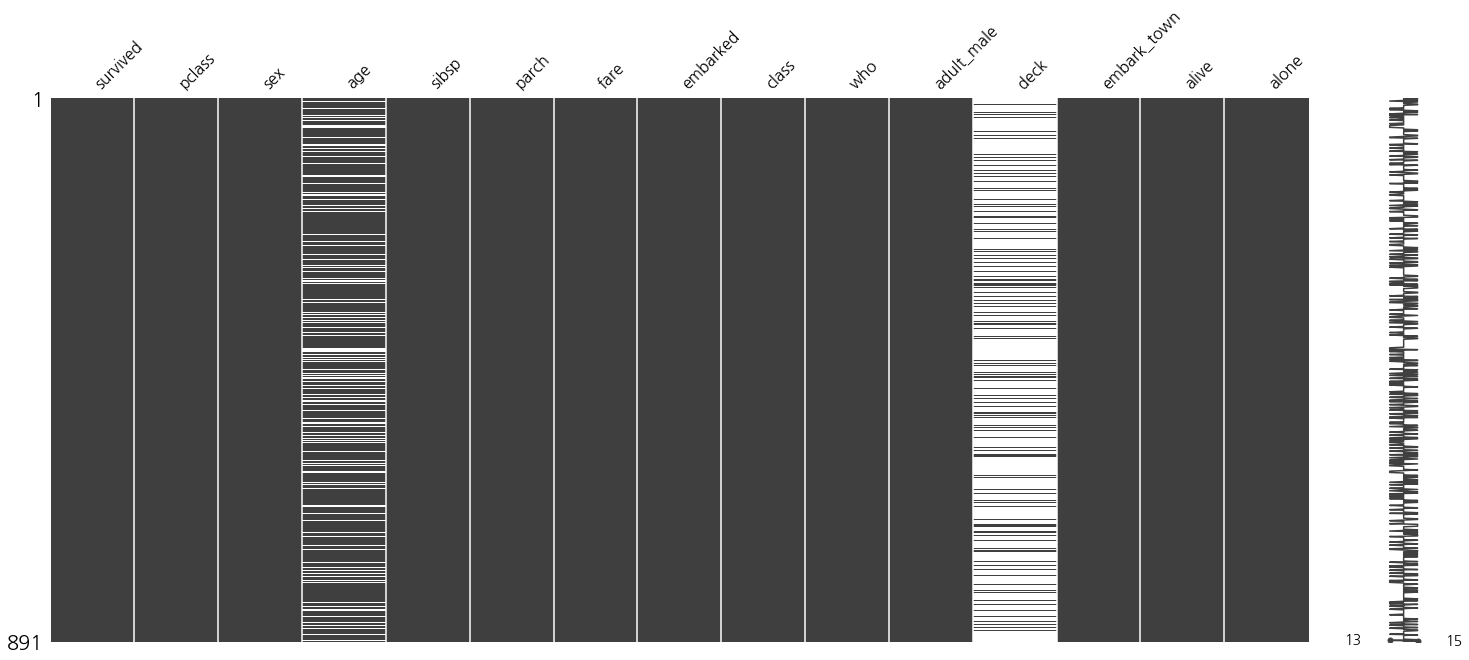

In [53]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

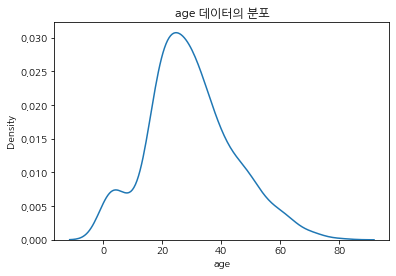

In [54]:
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

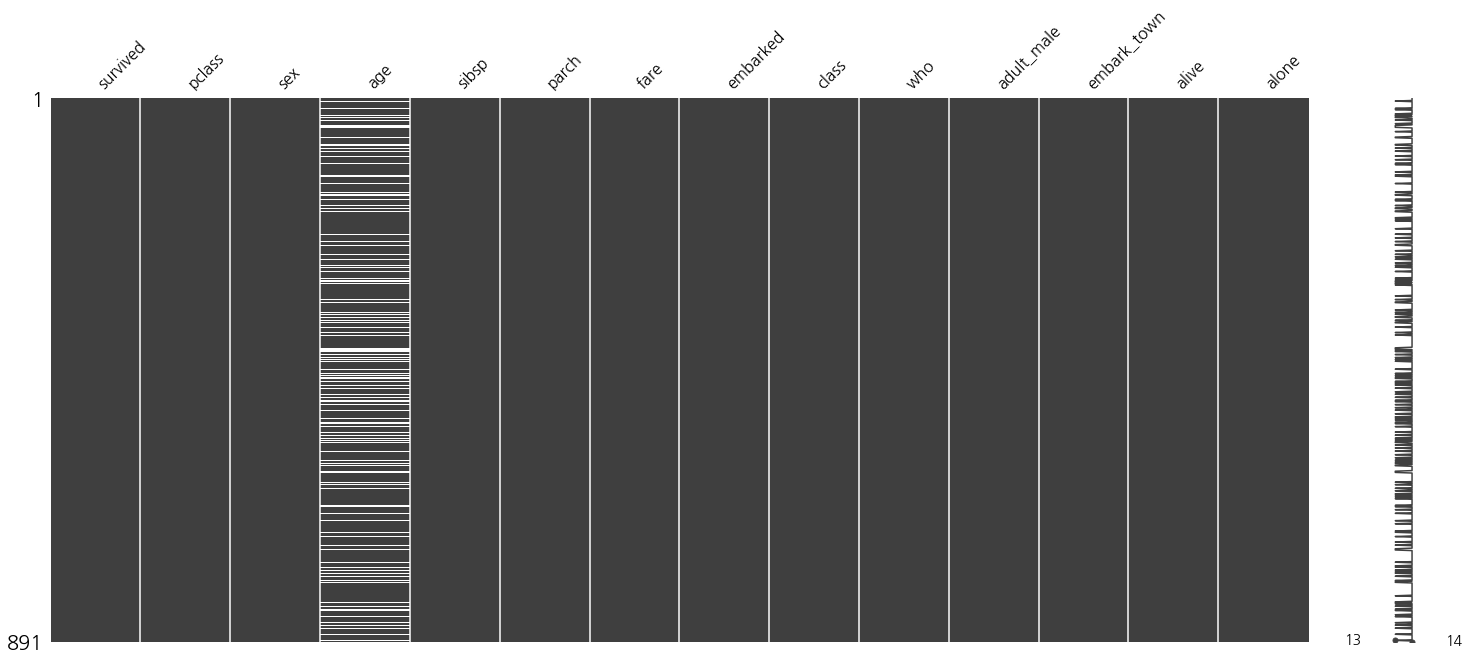

In [55]:
# 데이터가 절반 이상이 없는 열을 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)
plt.show()


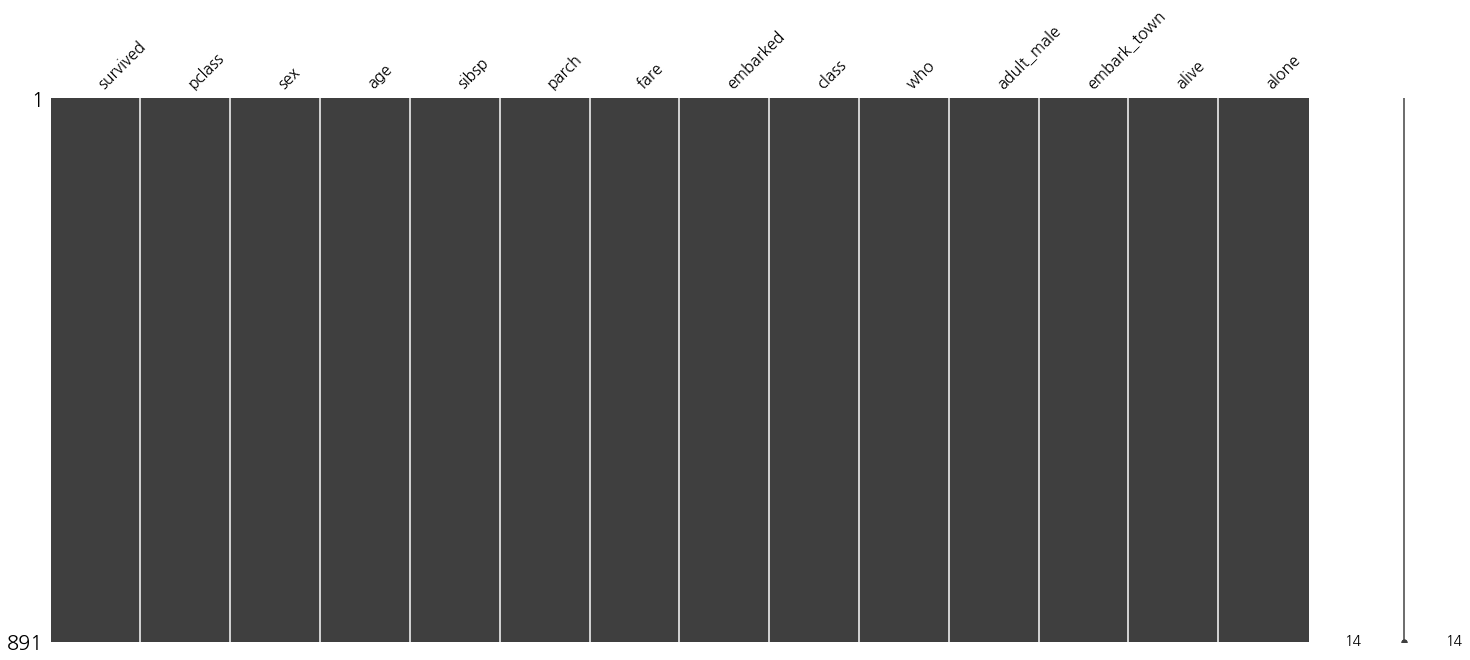

In [56]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()

## patsy 패키지

In [58]:
from patsy import demo_data

df = pd.DataFrame(demo_data('x1','x2', 'x3', 'x4', 'x5'))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


> data_transformed = dmatrix(formula, data)

In [59]:
from patsy import dmatrix

dmatrix("x1 + 0", data = df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [60]:
dmatrix("x1 + x2 + x3 + 0", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [61]:
dmatrix('x1 + x2 + x3', data = df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [62]:
dmatrix('x1 + x2 +x3 -1', data = df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [63]:
dmatrix('x1 + np.log(np.abs(x2))', df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [64]:
def ten_times(x):
    return 10*x

dmatrix('ten_times(x1)', df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

In [66]:
dmatrix('x1 + x2 + x1:x2 +0 ', df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

위 아래 수식이 같음 

In [67]:
dmatrix('x1 * x2 +0', df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

상호작용을 제외한 경우에는 I( )라는 연산자 사용

In [68]:
dmatrix('x1 + x2 + I(x1 + x2 )+ 0', df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

In [71]:
# x1데이터의 평균

dm = dmatrix('center(x1) + 0', df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [72]:
# x1의 데이터에서 x1의 평균을 빼기 

df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

In [74]:
# design_info라는 속성 내부에 저장

dm.design_info.factor_infos


{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

## sklearn.preprocessing 패키지

In [75]:
X = np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [79]:
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [80]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [81]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [83]:
X = 90 * np.arange(9).reshape(-1, 1) 
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

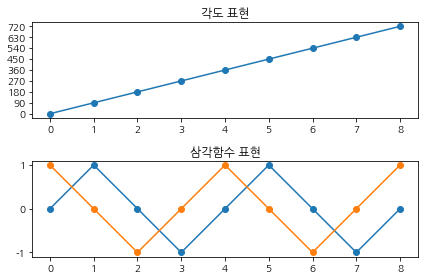

In [84]:
from sklearn.preprocessing import FunctionTransformer

def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker="o")
plt.yticks(X.flatten())
plt.title("각도 표현")
plt.subplot(212)
plt.plot(X2, marker="o")
plt.title("삼각함수 표현")
plt.tight_layout()
plt.show()